11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8891 - loss: 0.3446 - val_accuracy: 0.9843 - val_loss: 0.0471
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9861 - loss: 0.0464 - val_accuracy: 0.9894 - val_loss: 0.0321
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9902 - loss: 0.0323 - val_accuracy: 0.9851 - val_loss: 0.0451
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.9886 - val_loss: 0.0394
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9909 - val_loss: 0.0308
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9880 - loss: 0.0389
Test Accuracy:0.9908999800682068


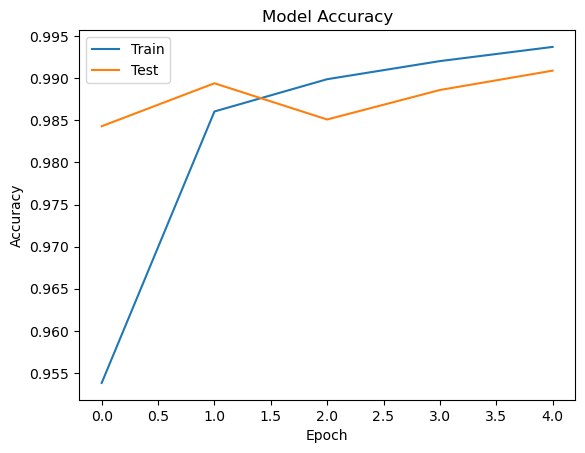

Test Loss:0.030790410935878754


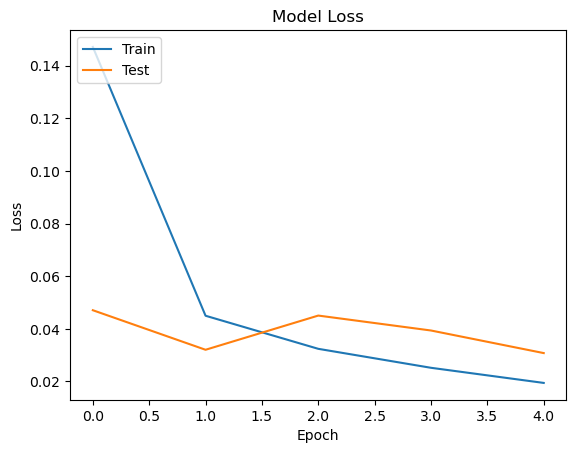

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

(train_imgs,train_labels),(test_imgs,test_labels)=datasets.mnist.load_data()
train_imgs=train_imgs.reshape((train_imgs.shape[0],28,28,1)).astype('float32')/255
test_imgs=test_imgs.reshape((test_imgs.shape[0],28,28,1)).astype('float32')/255

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist=model.fit(train_imgs,train_labels,epochs=5,validation_data=(test_imgs,test_labels))
test_loss,test_acc=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc}')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

print(f'Test Loss:{test_loss}')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Test Loss:0.030790410935878754


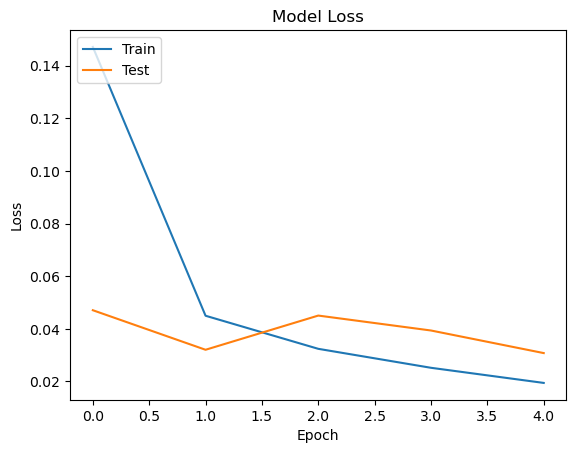

In [2]:
print(f'Test Loss:{test_loss}')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()